In [18]:
import keras
import numpy as np 
import requests
import datetime
import pandas as pd
import pandas_datareader.data as reader
from sklearn.svm import SVR
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style


style.use('ggplot')
start = datetime.datetime(2018,1,1)
end = datetime.datetime.today()
# start = datetime.datetime(2020,3,11)
# end = datetime.datetime(2020,8,1)
# end = datetime.date.today()
df = reader.DataReader("OKTA", 'yahoo', start, end)
# sort by date
df = df.sort_values('Date')

# fix the date 
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

def accessGrant():
    stripped = ""
    # adding noise to the data process:
    # data[::5] += 3 * (0.5 - np.random.rand(5))
    # accessfile = open("access.txt","r")
    with open("access.txt","r") as access:
            line = access.readline()
            cnt = 1
            while line:
                if ("finnhub" in line):
                    print(f'Line {cnt}: {line.strip("finnhub=~")}')
                stripped = line.strip("finnhub=~")
                line = access.readline()
                cnt += 1
                if(cnt>2):
                    break

def unixTimeStamp():
    timenow = datetime.datetime.now()
    epoch = datetime.datetime.utcfromtimestamp(0)
    value = (timenow - epoch).total_seconds() * 1000.0
    return(value,timenow)

def genWebHook():
    r = requests.post('https://finnhub.io/api/v1/webhook/add?token=', stripped , json={'event': 'earnings', 'symbol': 'TSLA'})
    res = r.json() # limit 30/sec base
    print(res)

def main():
    utc , _ = unixTimeStamp()
    print(utc)
    print(df.columns)
    # genWebHook()
if __name__ == "__main__":
    main()

# quandl.ApiConfig.api_key = contents
# data = quandl.get('WIKI/TSLA', start_date='2019-12-26', end_date='2020-7-28')
# tsla = quandl.get("EOD/TSLA")
# print(tsla.head())

1598569464438.463
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [19]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,26.500000,25.330000,25.549999,26.459999,1635300,26.459999
2018-01-03,26.549999,25.129999,25.870001,26.490000,2404300,26.490000
2018-01-04,26.959999,26.350000,26.500000,26.570000,948800,26.570000
2018-01-05,26.549999,25.639999,26.500000,26.540001,1553600,26.540001
2018-01-08,26.650000,26.070000,26.650000,26.389999,1287800,26.389999
...,...,...,...,...,...,...
2020-08-21,213.500000,206.119995,212.130005,208.389999,1052300,208.389999
2020-08-24,211.500000,202.000000,211.240005,205.119995,965100,205.119995
2020-08-25,209.660004,203.375000,205.449997,209.529999,939600,209.529999


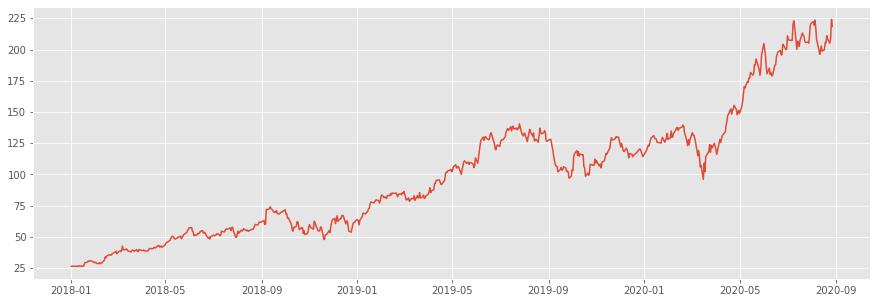

In [20]:
plt.figure(figsize = (15,5))
plt.plot(df["Adj Close"])

In [21]:
storeAdjClose = df['Adj Close']
mavg = storeAdjClose.rolling(window=100).mean()

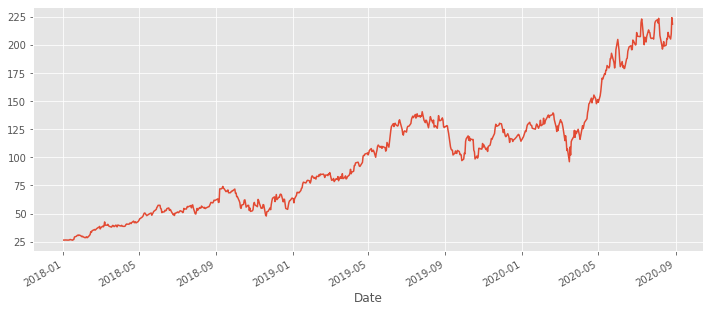

In [22]:
plt.figure(figsize = (12,5))
storeAdjClose.plot()

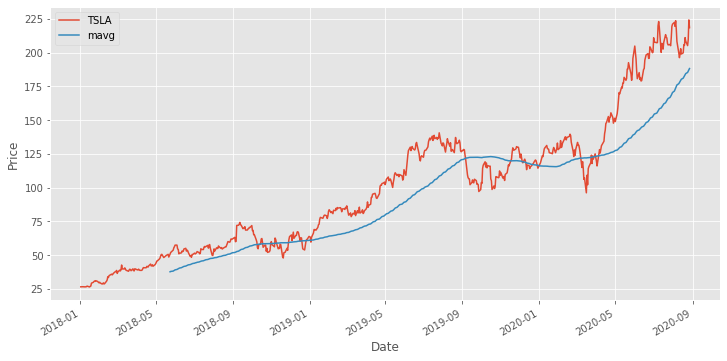

In [23]:
plt.figure(figsize = (12,6))
storeAdjClose.plot(label='TSLA')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [24]:

dates_df = df.copy()
dates_df = dates_df.reset_index()

org_dates = dates_df['Date']

dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates_df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
664,737658.0,213.500000,206.119995,212.130005,208.389999,1052300,208.389999
665,737661.0,211.500000,202.000000,211.240005,205.119995,965100,205.119995
666,737662.0,209.660004,203.375000,205.449997,209.529999,939600,209.529999
667,737663.0,226.080002,215.500000,216.000000,224.139999,2072900,224.139999
668,737664.0,225.000000,218.000000,223.300003,218.440002,2728900,218.440002


/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


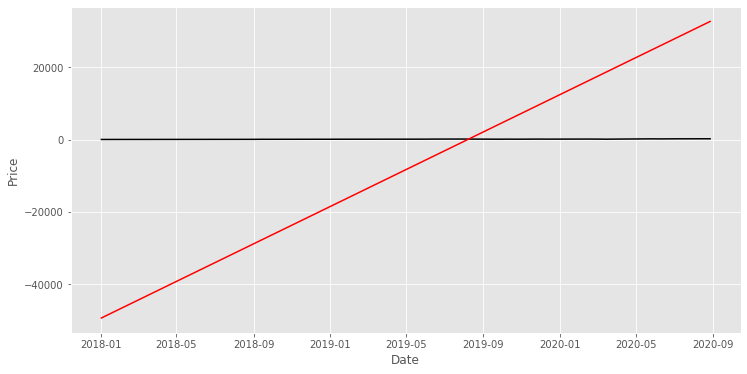

In [25]:
# kernels are used to map lower dimention datapoints to a high dimentional data space
dates = dates_df['Date'].to_numpy()
prices = df['Adj Close'].to_numpy()
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))
svrTickerLinear = SVR(kernel= 'linear')
svrTickerLinear.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTickerLinear.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


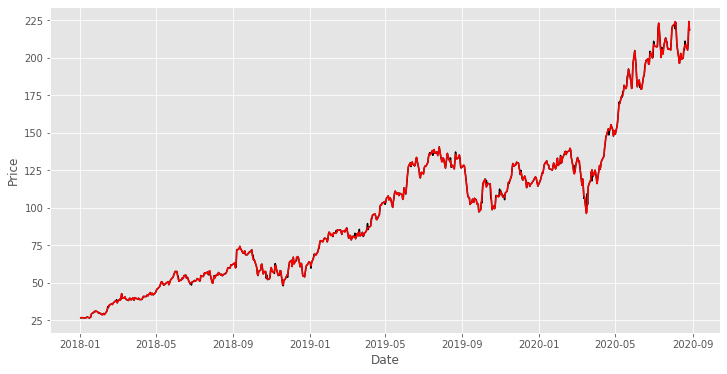

In [26]:
svrTickerRBF = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svrTickerRBF.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTickerRBF.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


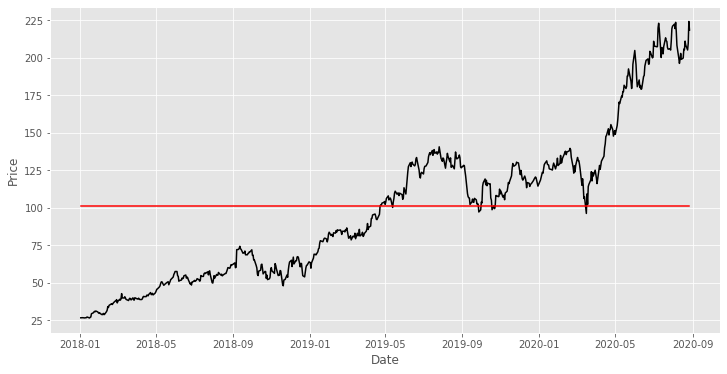

In [27]:
svrTicker = SVR(kernel= 'sigmoid')
svrTicker.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTicker.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [29]:
style.use('ggplot')
start_b = datetime.datetime(2018,1,1)
end_b = datetime.datetime.today()
# start = datetime.datetime(2020,3,11)
# end = datetime.datetime(2020,8,1)
# end = datetime.date.today()
df_b = reader.DataReader("MCD", 'yahoo', start_b, end_b)
# sort by date
df_b = df_b.sort_values('Date')


In [30]:
print(df_b)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2018-01-02  174.479996  172.660004  173.729996  173.220001  3696900.0   
2018-01-03  173.639999  172.000000  173.229996  172.490005  3789600.0   
2018-01-04  174.130005  172.729996  173.240005  173.699997  2756400.0   
2018-01-05  175.000000  173.399994  174.000000  174.050003  3737700.0   
2018-01-08  174.210007  172.929993  173.740005  173.929993  2060800.0   
...                ...         ...         ...         ...        ...   
2020-08-21  212.190002  209.259995  209.960007  211.570007  3484800.0   
2020-08-24  213.500000  210.929993  212.259995  212.619995  2463900.0   
2020-08-25  214.190002  212.220001  213.960007  212.649994  2302400.0   
2020-08-26  214.419998  211.600006  212.089996  213.759995  2316700.0   
2020-08-27  216.100006  212.100006  214.339996  212.190002  3226300.0   

             Adj Close  
Date                    


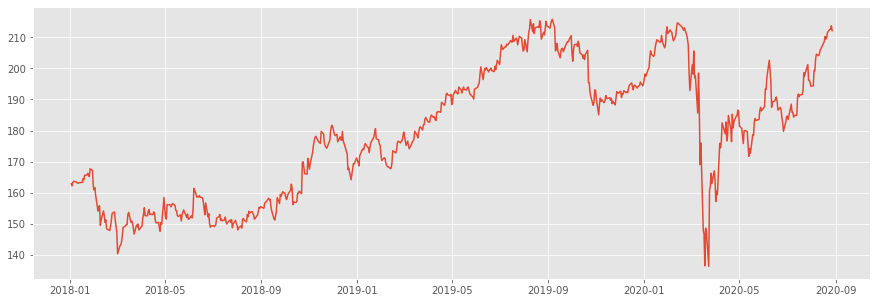

In [31]:
plt.figure(figsize = (15,5))
plt.plot(df_b["Adj Close"])

ModuleNotFoundError: No module named 'finnhub'